In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/watai-open-project-f23-beginner-dl/beginner_data.npz


In [2]:
#loading le data

import numpy as np
import tensorflow as tf

with np.load("/kaggle/input/watai-open-project-f23-beginner-dl/beginner_data.npz") as data:
    X_train = data['train_images']
    y_train = data['train_labels']
    X_test = data['test_images']
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
X_train.shape

(56259, 64, 64, 3)

In [4]:
X_train.dtype

dtype('uint8')

In [5]:
X_test.shape

(10800, 64, 64, 3)

In [6]:
X_test.dtype

dtype('uint8')

In [7]:
y_train.shape

(56259,)

In [8]:
y_train.dtype

dtype('int64')

In [9]:
#scaling pixel intensities down to the  0-1 range by dividing them by 255 (RGB coefficient...)
X_train, X_test = X_train / 255., X_test / 255.

In [10]:
# Data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

In [11]:
from functools import partial

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                       activation="relu", kernel_initializer="he_normal")
model = tf.keras.Sequential([                                            #Creating Sequential model
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[64, 64, 3]),   #First layer is DefaultConv2D with 64 larger filters, also specifying input specs for images
    tf.keras.layers.MaxPool2D(), # adding max pooling layer that uses the default pool size of 2
    DefaultConv2D(filters=128),  # two convolutional layers followed by a max pooling layer... TWICE
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),  # we're doubling number of filters as we climb up the CNN, as there are many ways to combine the low-level features into high-level features...
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),   # Flattening it out
    tf.keras.layers.Dense(units=128, activation="relu",
                         kernel_initializer="he_normal"),            #fully connected network consists of two hidden dense layers and a dense output layer
    tf.keras.layers.Dropout(0.5),                           #dropout layers ensure we reduce overfitting
    tf.keras.layers.Dense(units=64, activation="relu",
                         kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=12, activation="softmax")     #12 types of products, and it's classfication (so softmax...)
])

In [12]:
# displaying all of our model's layers...
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        9472      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 256)       2

In [13]:
# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# specifying loss function and optimizer to use as well
# we're using sparse_categorical_crossentrophy as we have sparse labels with exclusive classes.
# using stochastic gradient descent to train model with backpropogation
# "accuracy" because this is a CLASSIFIER

In [14]:
# training and evaluating the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=120)

Epoch 1/120
1759/1759 [==============================] - 86s 42ms/step - loss: 2.4868 - accuracy: 0.0940
Epoch 2/120
1759/1759 [==============================] - 74s 42ms/step - loss: 2.4178 - accuracy: 0.1405
Epoch 3/120
1759/1759 [==============================] - 72s 41ms/step - loss: 2.3649 - accuracy: 0.1743
Epoch 4/120
1759/1759 [==============================] - 72s 41ms/step - loss: 2.2948 - accuracy: 0.2100
Epoch 5/120
1759/1759 [==============================] - 73s 41ms/step - loss: 2.2296 - accuracy: 0.2360
Epoch 6/120
1759/1759 [==============================] - 71s 40ms/step - loss: 2.1910 - accuracy: 0.2526
Epoch 7/120
1759/1759 [==============================] - 71s 40ms/step - loss: 2.1656 - accuracy: 0.2626
Epoch 8/120
1759/1759 [==============================] - 71s 40ms/step - loss: 2.1440 - accuracy: 0.2727
Epoch 9/120
1759/1759 [==============================] - 71s 40ms/step - loss: 2.1295 - accuracy: 0.2808
Epoch 10/120
1759/1759 [==============================]

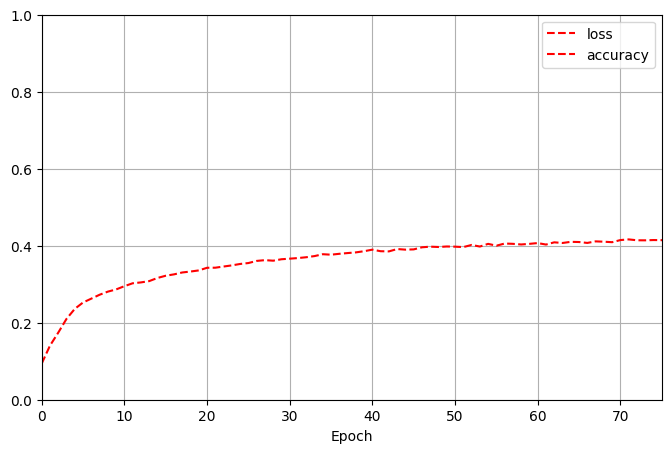

In [15]:
# plotting the thing

import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,75], ylim=[0,1], grid=True, xlabel="Epoch",
    style=["r--", "r--", "b-", "b-*"])
plt.show()

In [16]:
import numpy as np

# Make predictions with the model on an unshuffled test dataset
predictions = model.predict(X_test)

predicted_classes = np.argmax(predictions, axis=1) 

N_test = X_test.shape[0]
df = pd.DataFrame({
    "Index": np.arange(N_test),
    "Label": predicted_classes
})
df.to_csv("submission.csv", index=False)

338/338 [==============================] - 2s 6ms/step
